# Load Datasets

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

## CIFAR10

In [15]:
trainset_CIFAR10 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader_CIFAR10 = torch.utils.data.DataLoader(trainset_CIFAR10, batch_size=batch_size, shuffle=True, num_workers=2)

testset_CIFAR10 = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader_CIFAR10 = torch.utils.data.DataLoader(testset_CIFAR10, batch_size=batch_size, shuffle=False, num_workers=2)

classes_CIFAR10 = ('Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

Files already downloaded and verified
Files already downloaded and verified


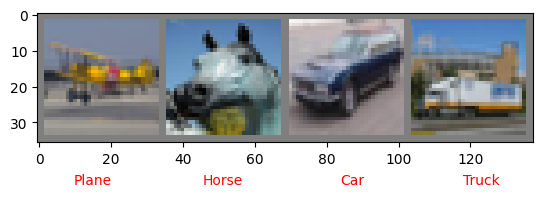

In [17]:
def imshow(img, labels):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    for i, label in enumerate(labels):
        plt.text(i * img.size(1) + 15, img.size(1) + 10, classes_CIFAR10[label], ha='center', va='center', color='red')

    plt.show()

dataiter = iter(trainloader_CIFAR10)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images), labels)

In [11]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x


In [12]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = self.downsample(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x += residual
        x = self.relu(x)
        return x

class ResidualCNN(nn.Module):
    def __init__(self):
        super(ResidualCNN, self).__init__()
        self.conv1 = ResidualBlock(3, 32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = ResidualBlock(32, 64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = ResidualBlock(64, 128)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = self.pool3(self.conv3(x))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [40]:
torch.manual_seed(42)

Epoch 1/10, Loss: 1.7832672873449325
Epoch 2/10, Loss: 1.3774139152181148
Epoch 3/10, Loss: 1.2120494895491003
Epoch 4/10, Loss: 1.1073141614899784
Epoch 5/10, Loss: 1.0342830812515318
Epoch 6/10, Loss: 0.9629122399114631
Epoch 7/10, Loss: 0.9110521710570529
Epoch 8/10, Loss: 0.8634564995336625
Epoch 9/10, Loss: 0.8266518193416323
Epoch 10/10, Loss: 0.794307504793799
Model0 saved successfully.
Model0	Learning rate : 0.01


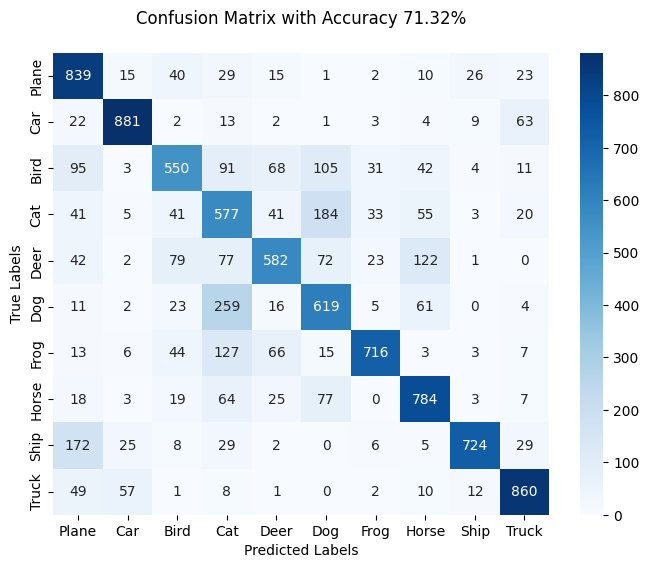




Epoch 1/10, Loss: 1.26222483984299
Epoch 2/10, Loss: 0.8163734400965273
Epoch 3/10, Loss: 0.6550609984260168
Epoch 4/10, Loss: 0.5539080032197735
Epoch 5/10, Loss: 0.4705730615754989
Epoch 6/10, Loss: 0.4038294222167598
Epoch 7/10, Loss: 0.3484314776749367
Epoch 8/10, Loss: 0.2976686591538583
Epoch 9/10, Loss: 0.2632958985319001
Epoch 10/10, Loss: 0.23291546238340732
Model1 saved successfully.
Model1	Learning rate : 0.001


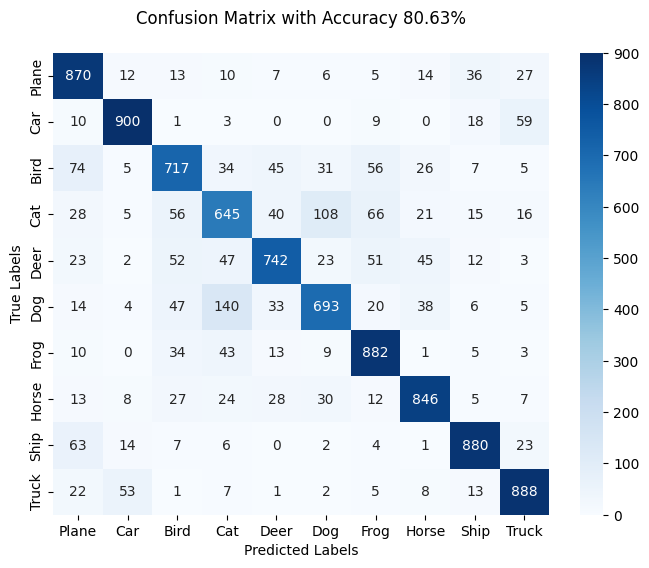




Epoch 1/10, Loss: 1.1529300497162343
Epoch 2/10, Loss: 0.7550165356857144
Epoch 3/10, Loss: 0.6003695306644682
Epoch 4/10, Loss: 0.4919668986896309
Epoch 5/10, Loss: 0.39769999509652176
Epoch 6/10, Loss: 0.3223868938721191
Epoch 7/10, Loss: 0.2622210817835907
Epoch 8/10, Loss: 0.20832990504394852
Epoch 9/10, Loss: 0.1722909593105346
Epoch 10/10, Loss: 0.1391634430655837
Model2 saved successfully.
Model2	Learning rate : 0.0001


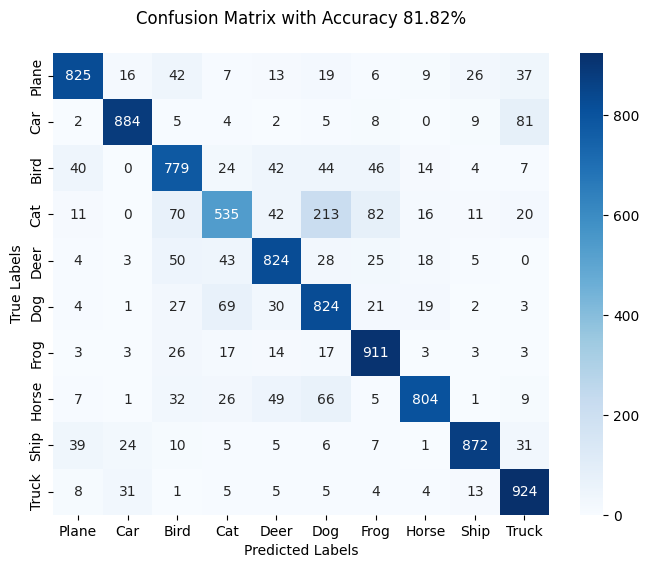




Epoch 1/10, Loss: 1.4903595459663868
Epoch 2/10, Loss: 1.1271340260308982
Epoch 3/10, Loss: 0.9763827054935694
Epoch 4/10, Loss: 0.869753022531122
Epoch 5/10, Loss: 0.793723204073757
Epoch 6/10, Loss: 0.7244585653696581
Epoch 7/10, Loss: 0.6655707833828032
Epoch 8/10, Loss: 0.6119495611751825
Epoch 9/10, Loss: 0.5619725843040831
Epoch 10/10, Loss: 0.5192223379879445
Model3 saved successfully.
Model3	Learning rate : 1e-05


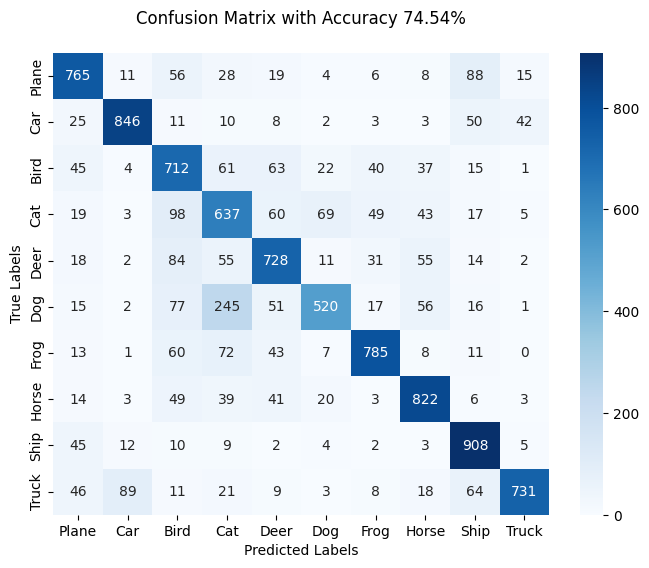

In [15]:
lr = [0.01, 0.001, 0.0001, 0.00001]

i = 0
for l in lr:
    model = ResidualCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=l)

    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader_CIFAR10:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader_CIFAR10)}')
    
    # Save model
    torch.save(model.state_dict(), f'./models/cifar10/r_model{i}.pth')
    print(f'Model{i} saved successfully.')

    # Evaluate
    model.eval()
    all_predictions = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in testloader_CIFAR10:
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Plot
    print(f'Model{i}\tLearning rate : {l}')
    accuracy = accuracy_score(true_labels, all_predictions)
    conf_matrix = confusion_matrix(true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_CIFAR10, yticklabels=classes_CIFAR10)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix with Accuracy {accuracy*100:.2f}%\n')
    plt.savefig(f'./models/cifar10/r_cunfusion_matrix{i}')
    plt.show()
    print('\n\n')
    i += 1

Epoch 1/10, Loss: 2.307229856929779
Epoch 2/10, Loss: 2.306310707778931
Epoch 3/10, Loss: 2.305931727981567
Epoch 4/10, Loss: 2.306647268810272
Epoch 5/10, Loss: 2.3064691689682006
Epoch 6/10, Loss: 2.306362838973999
Epoch 7/10, Loss: 2.306356949520111
Epoch 8/10, Loss: 2.306599322319031
Epoch 9/10, Loss: 2.3062010077285766
Epoch 10/10, Loss: 2.3065025359344484
Model0 saved successfully.
Model0	Learning rate : 0.01


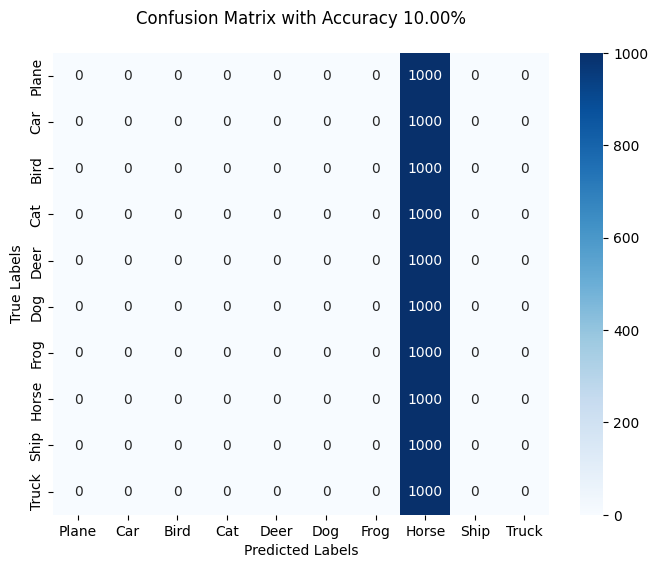




Epoch 1/10, Loss: 1.2753951996026933
Epoch 2/10, Loss: 0.909512182869818
Epoch 3/10, Loss: 0.7803382387604472
Epoch 4/10, Loss: 0.6936016180664848
Epoch 5/10, Loss: 0.623296650796245
Epoch 6/10, Loss: 0.5650765649205886
Epoch 7/10, Loss: 0.5172583470584967
Epoch 8/10, Loss: 0.4815655914240915
Epoch 9/10, Loss: 0.44695070654393754
Epoch 10/10, Loss: 0.42370831704458867
Model1 saved successfully.
Model1	Learning rate : 0.001


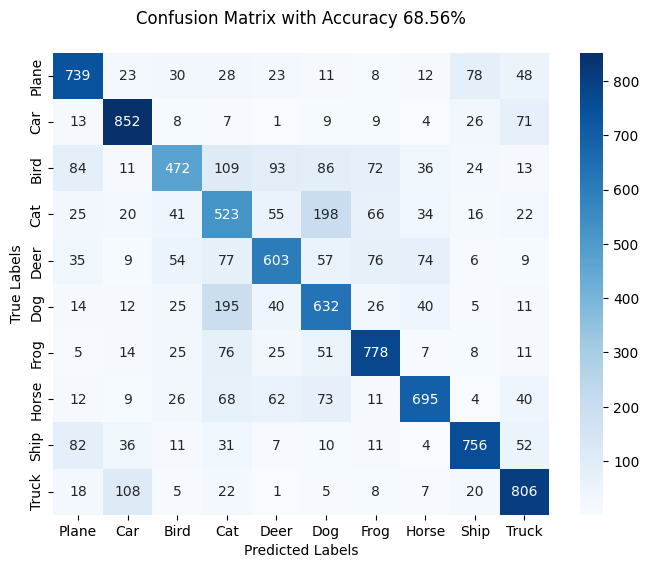




Epoch 1/10, Loss: 1.4161842249000072
Epoch 2/10, Loss: 1.0288003836986424
Epoch 3/10, Loss: 0.8529864128046111
Epoch 4/10, Loss: 0.7240071278484166
Epoch 5/10, Loss: 0.6184070278016665
Epoch 6/10, Loss: 0.5229281373354024
Epoch 7/10, Loss: 0.4347272827023
Epoch 8/10, Loss: 0.35364501199184073
Epoch 9/10, Loss: 0.27989897480908055
Epoch 10/10, Loss: 0.2121574852447353
Model2 saved successfully.
Model2	Learning rate : 0.0001


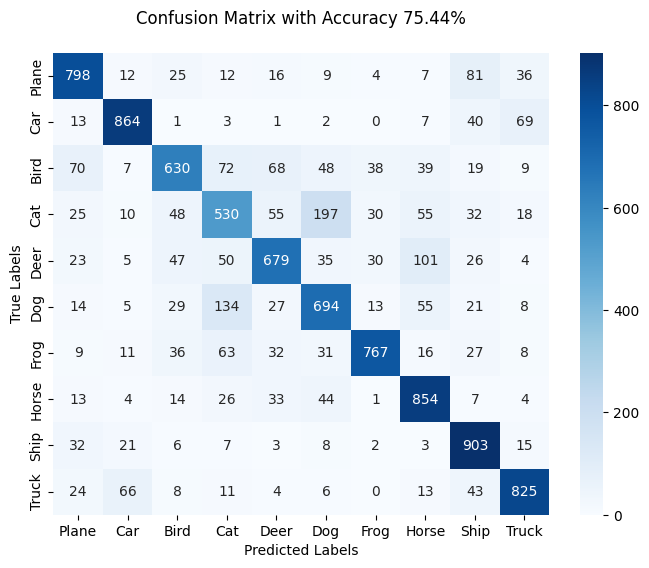




Epoch 1/10, Loss: 1.8341097690916062
Epoch 2/10, Loss: 1.5543636907863616
Epoch 3/10, Loss: 1.4487279451918602
Epoch 4/10, Loss: 1.3795698931980134
Epoch 5/10, Loss: 1.323654041093588
Epoch 6/10, Loss: 1.2765370237886906
Epoch 7/10, Loss: 1.2370286696338653
Epoch 8/10, Loss: 1.198801553298831
Epoch 9/10, Loss: 1.163686234756708
Epoch 10/10, Loss: 1.131600479695797
Model3 saved successfully.
Model3	Learning rate : 1e-05


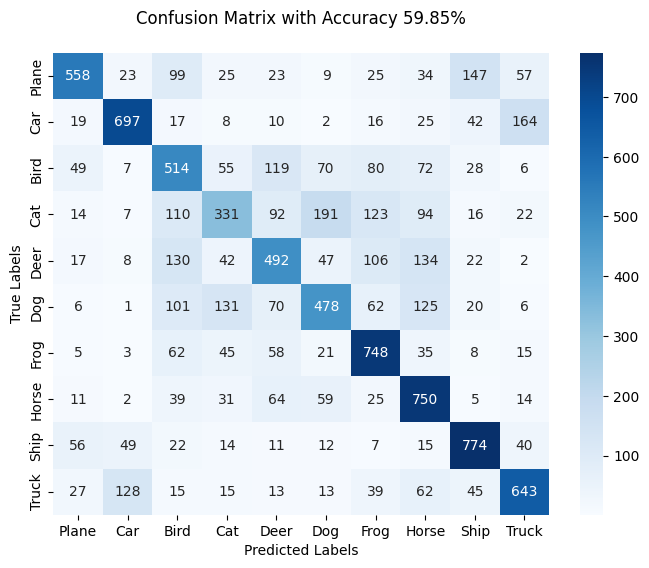

In [20]:
lr = [0.01, 0.001, 0.0001, 0.00001]

i = 0
for l in lr:
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=l)

    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader_CIFAR10:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader_CIFAR10)}')
    
    # Save model
    torch.save(model.state_dict(), f'./models/cifar10/model{i}.pth')
    print(f'Model{i} saved successfully.')

    # Evaluate
    model.eval()
    all_predictions = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in testloader_CIFAR10:
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Plot
    print(f'Model{i}\tLearning rate : {l}')
    accuracy = accuracy_score(true_labels, all_predictions)
    conf_matrix = confusion_matrix(true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_CIFAR10, yticklabels=classes_CIFAR10)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix with Accuracy {accuracy*100:.2f}%\n')
    plt.savefig(f'./models/cifar10/cunfusion_matrix{i}')
    plt.show()
    print('\n\n')
    i += 1

Epoch 1/25, Loss: 1.4233972970426083
Epoch 2/25, Loss: 1.0427274819040298
Epoch 3/25, Loss: 0.8566611988449097
Epoch 4/25, Loss: 0.7279441384268179
Epoch 5/25, Loss: 0.6220650610444695
Epoch 6/25, Loss: 0.5313699615727784
Epoch 7/25, Loss: 0.451238151683344
Epoch 8/25, Loss: 0.37531181268965474
Epoch 9/25, Loss: 0.3027384582592749
Epoch 10/25, Loss: 0.23686056709013034
Epoch 11/25, Loss: 0.18066704574342787
Epoch 12/25, Loss: 0.13550384578821417
Epoch 13/25, Loss: 0.10344017487076909
Epoch 14/25, Loss: 0.07807438521019425
Epoch 15/25, Loss: 0.06542057125413352
Epoch 16/25, Loss: 0.05612803439136683
Epoch 17/25, Loss: 0.050641133174164805
Epoch 18/25, Loss: 0.045394057145842465
Epoch 19/25, Loss: 0.0414009412703692
Epoch 20/25, Loss: 0.038944050700414276
Epoch 21/25, Loss: 0.03533362501457083
Epoch 22/25, Loss: 0.03458957298413145
Epoch 23/25, Loss: 0.03321820990727555
Epoch 24/25, Loss: 0.031388769606516986
Epoch 25/25, Loss: 0.031693482925267503
Model4 saved successfully.
Model4	Learn

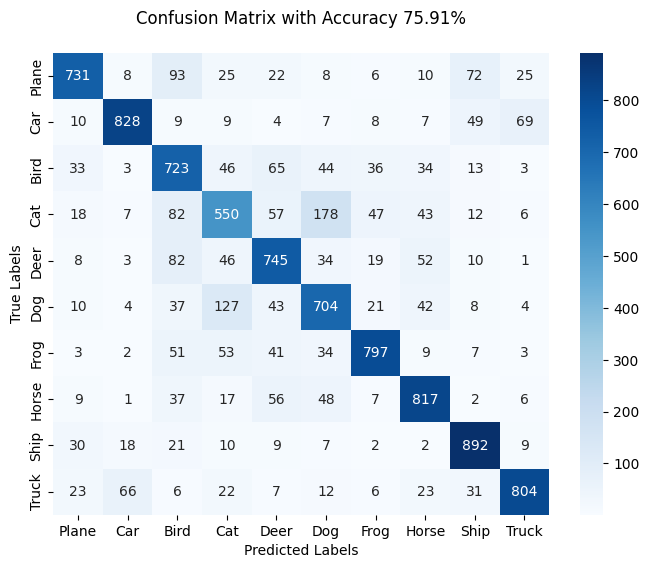

In [8]:
i = 4

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in trainloader_CIFAR10:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader_CIFAR10)}')

# Save model
torch.save(model.state_dict(), f'./models/cifar10/model{i}.pth')
print(f'Model{i} saved successfully.')

# Evaluate
model.eval()
all_predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in testloader_CIFAR10:
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Plot
print(f'Model{i}\tLearning rate : {0.0001}')
accuracy = accuracy_score(true_labels, all_predictions)
conf_matrix = confusion_matrix(true_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_CIFAR10, yticklabels=classes_CIFAR10)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix with Accuracy {accuracy*100:.2f}%\n')
plt.savefig(f'./models/cifar10/cunfusion_matrix{i}')
plt.show()

Epoch 1/25, Loss: 1.16400367636472
Epoch 2/25, Loss: 0.7647672566384822
Epoch 3/25, Loss: 0.605926714638602
Epoch 4/25, Loss: 0.4927564877542504
Epoch 5/25, Loss: 0.4029974475808628
Epoch 6/25, Loss: 0.32679010445220424
Epoch 7/25, Loss: 0.26377942531485266
Epoch 8/25, Loss: 0.2163085080105447
Epoch 9/25, Loss: 0.17434391145726646
Epoch 10/25, Loss: 0.14136815123472737
Epoch 11/25, Loss: 0.12088352750765431
Epoch 12/25, Loss: 0.10408780274766911
Epoch 13/25, Loss: 0.09339260565724057
Epoch 14/25, Loss: 0.08423847761339799
Epoch 15/25, Loss: 0.07743376805533779
Epoch 16/25, Loss: 0.0700220001823214
Epoch 17/25, Loss: 0.06421263433123302
Epoch 18/25, Loss: 0.059432255058951035
Epoch 19/25, Loss: 0.057921590624995876
Epoch 20/25, Loss: 0.05470023636207801
Epoch 21/25, Loss: 0.051699269656679654
Epoch 22/25, Loss: 0.04770020143974778
Epoch 23/25, Loss: 0.046758015515767255
Epoch 24/25, Loss: 0.044357786257248455
Epoch 25/25, Loss: 0.04262718735420886
Model4 saved successfully.
Model4	Learn

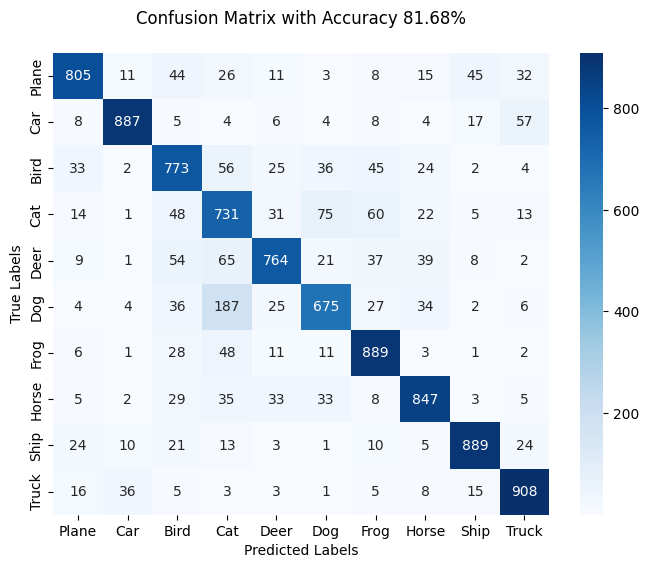

In [7]:
i = 4

model = ResidualCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in trainloader_CIFAR10:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(trainloader_CIFAR10)}')

# Save model
torch.save(model.state_dict(), f'./models/cifar10/r_model{i}.pth')
print(f'Model{i} saved successfully.')

# Evaluate
model.eval()
all_predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in testloader_CIFAR10:
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Plot
print(f'Model{i}\tLearning rate : {0.0001}')
accuracy = accuracy_score(true_labels, all_predictions)
conf_matrix = confusion_matrix(true_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_CIFAR10, yticklabels=classes_CIFAR10)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix with Accuracy {accuracy*100:.2f}%\n')
plt.savefig(f'./models/cifar10/r_cunfusion_matrix{i}')
plt.show()

## STL10

In [3]:
trainset_STL10 = torchvision.datasets.STL10(root='./data', split='train', download=True, transform=transform)
trainloader_STL10 = torch.utils.data.DataLoader(trainset_STL10, batch_size=batch_size, shuffle=True, num_workers=2)

testset_STL10 = torchvision.datasets.STL10(root='./data', split='test', download=True, transform=transform)
testloader_STL10 = torch.utils.data.DataLoader(testset_STL10, batch_size=batch_size, shuffle=False, num_workers=2)

classes_STL10 = ('Airplane', 'Bird', 'Car', 'Cat', 'Deer', 'Dog', 'Horse', 'Monkey', 'Ship', 'Truck')

Files already downloaded and verified
Files already downloaded and verified


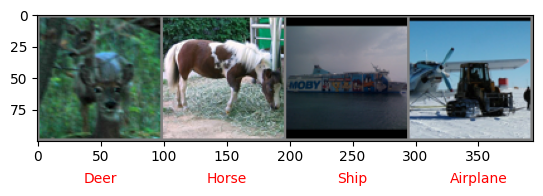

In [4]:
def imshow(img, labels):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    for i, label in enumerate(labels):
        plt.text(i * img.size(1) + 50, img.size(1) + 30, classes_STL10[label], ha='center', va='center', color='red')

    plt.show()

dataiter = iter(trainloader_STL10)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images), labels)

### With our models

#### SimpleCNN

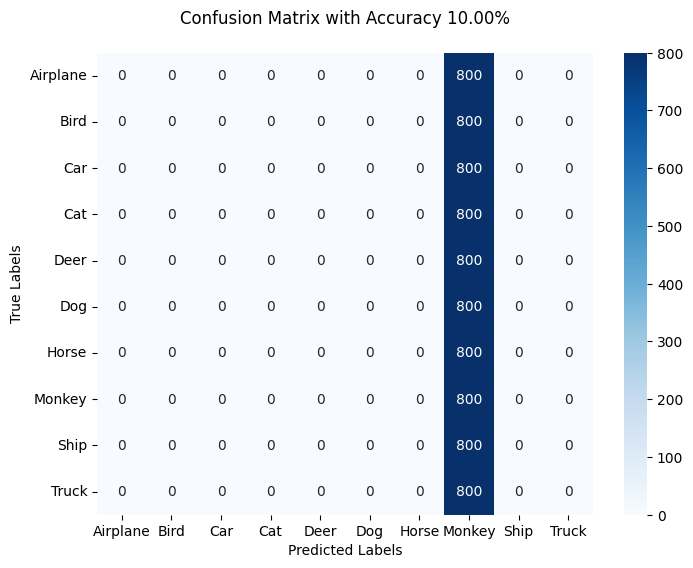

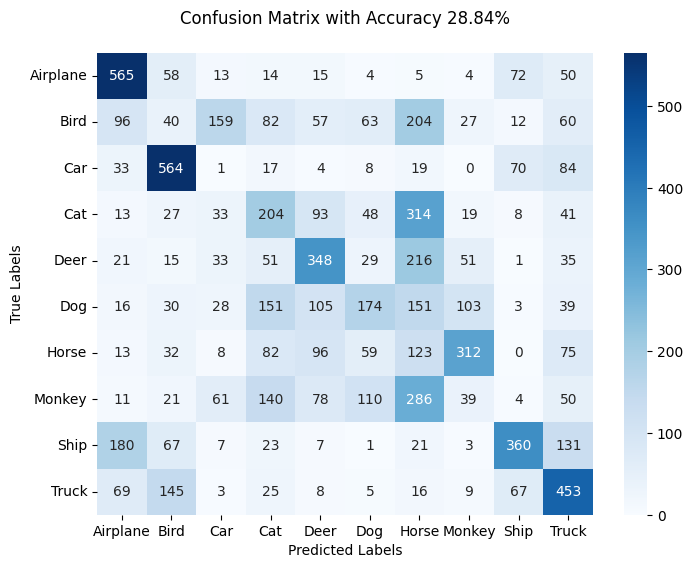

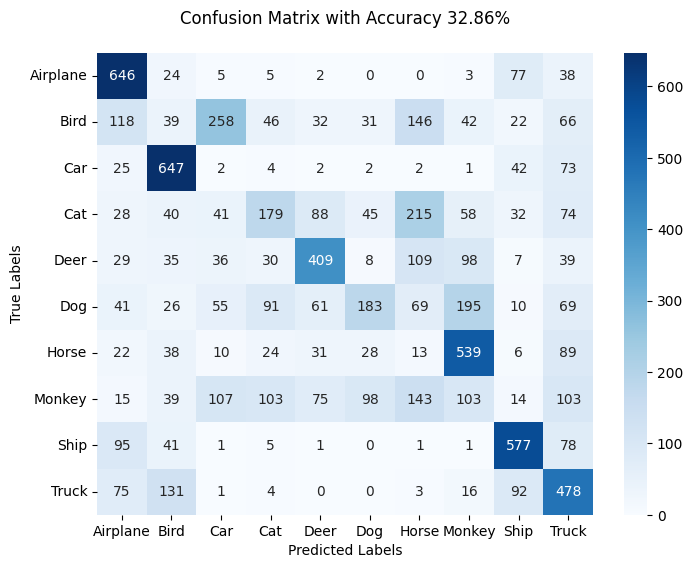

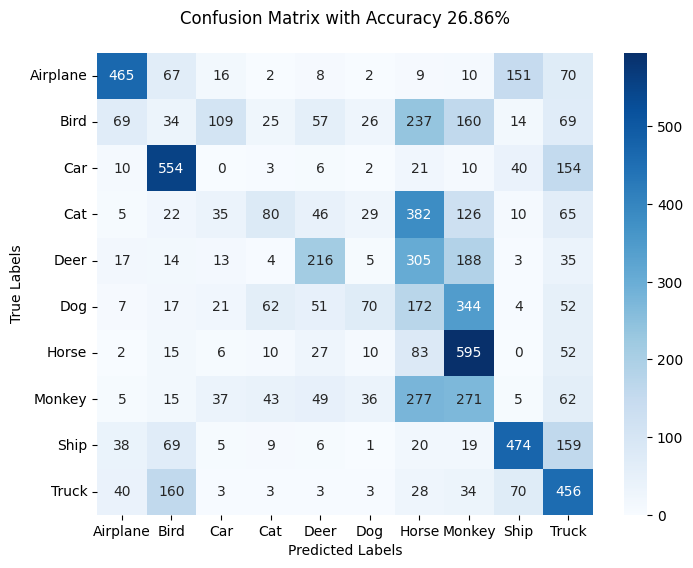

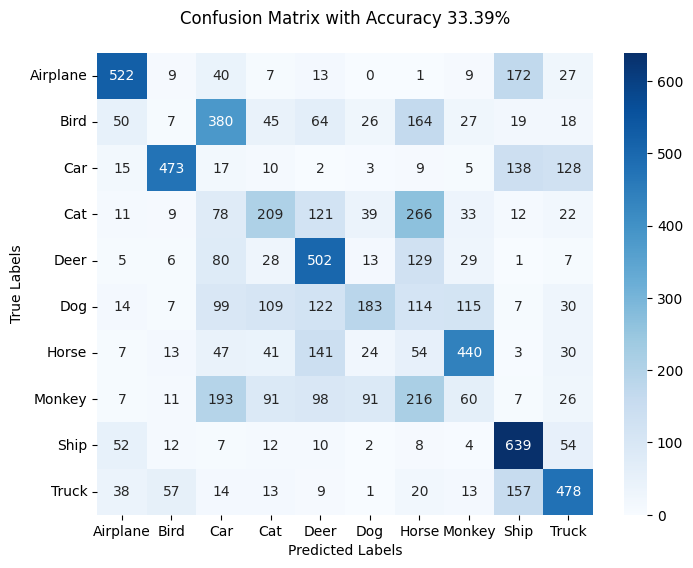

In [31]:
# Load model
for i in range(0, 5):
    model = SimpleCNN()
    model.load_state_dict(torch.load(f'./models/cifar10/model{i}.pth'))

    # Evaluate
    model.eval()
    all_predictions = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in testloader_STL10:
            inputs_resized = F.interpolate(inputs, size=(32, 32), mode='bilinear', align_corners=False)
            outputs = model(inputs_resized)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Plot
    accuracy = accuracy_score(true_labels, all_predictions)
    conf_matrix = confusion_matrix(true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_STL10, yticklabels=classes_STL10)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix with Accuracy {accuracy*100:.2f}%\n')
    plt.savefig(f'./models/stl10/cunfusion_matrix{i}')
    plt.show()
    print('\n\n')

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5, Loss: 2.3042476022720337
Epoch 2/5, Loss: 2.3033887407302855
Epoch 3/5, Loss: 2.303277079963684
Epoch 4/5, Loss: 2.303254239845276
Epoch 5/5, Loss: 2.3032425537109376


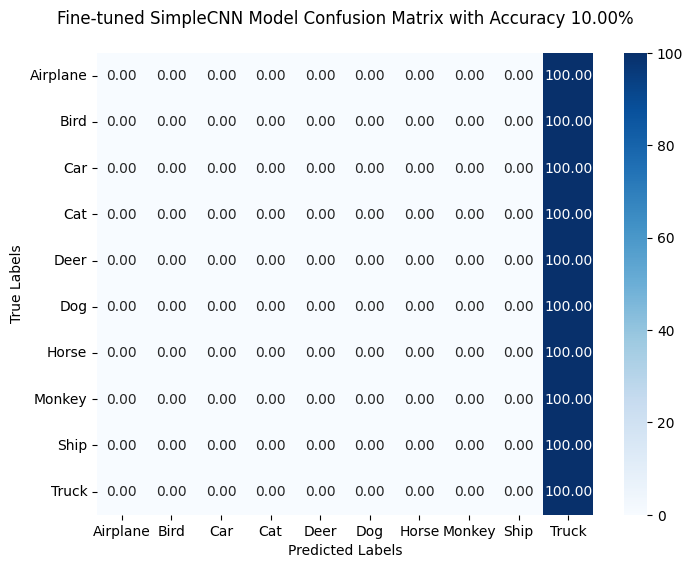

Epoch 1/5, Loss: 2.7566144583205636
Epoch 2/5, Loss: 1.2439517583679407
Epoch 3/5, Loss: 0.912825950615853
Epoch 4/5, Loss: 0.7077892572364304
Epoch 5/5, Loss: 0.539277090961393


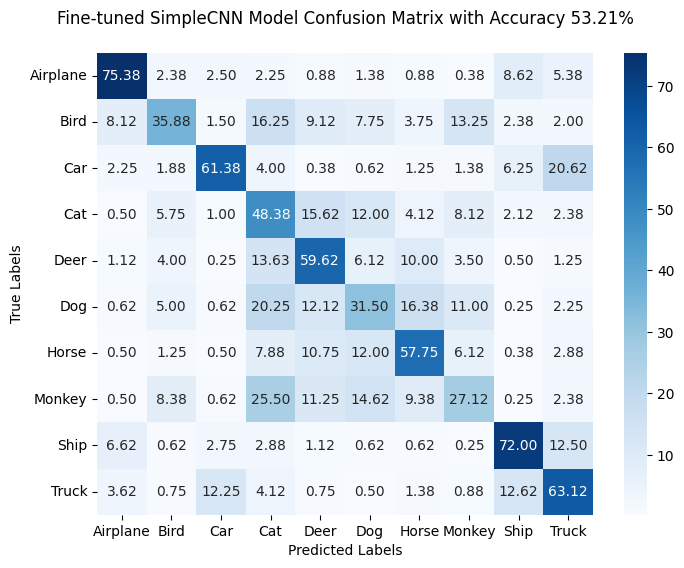

Epoch 1/5, Loss: 1.4440945541381836
Epoch 2/5, Loss: 0.8639840044427664
Epoch 3/5, Loss: 0.5973702258279547
Epoch 4/5, Loss: 0.4034770895599388
Epoch 5/5, Loss: 0.2406170293448493


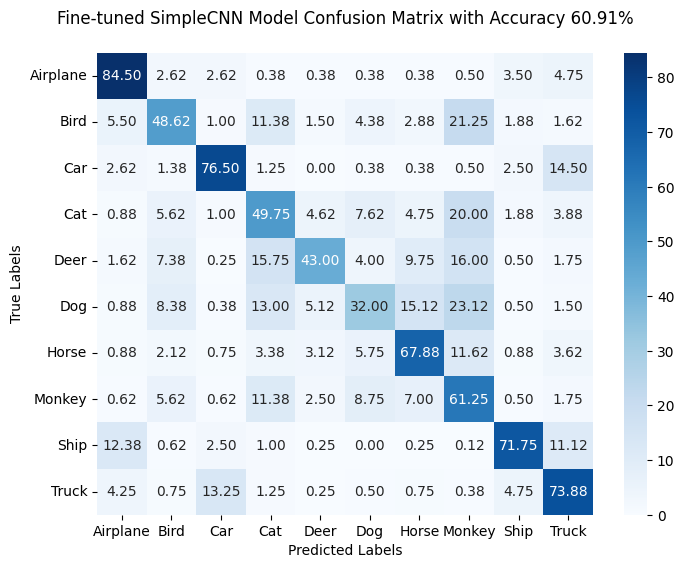

Epoch 1/5, Loss: 1.6833628981351851
Epoch 2/5, Loss: 1.452562361574173
Epoch 3/5, Loss: 1.3882330591440202
Epoch 4/5, Loss: 1.3358795289635659
Epoch 5/5, Loss: 1.2876182272911072


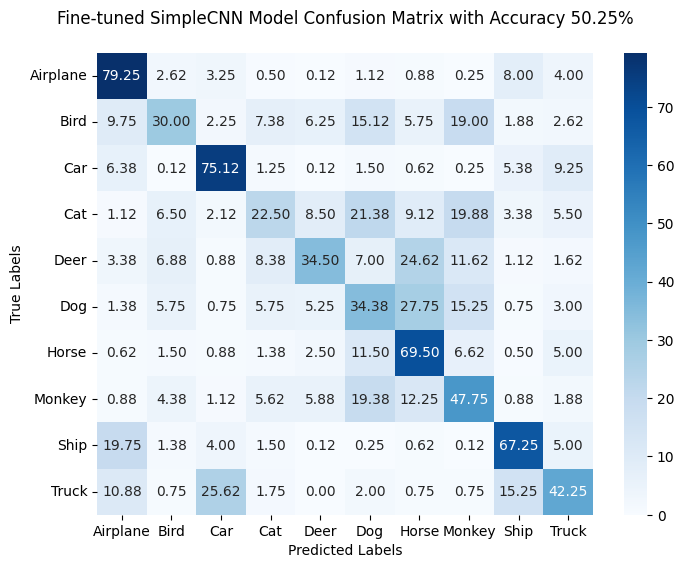

Epoch 1/5, Loss: 2.0797590329920874
Epoch 2/5, Loss: 0.9547877934977412
Epoch 3/5, Loss: 0.6809474686292
Epoch 4/5, Loss: 0.452766261651204
Epoch 5/5, Loss: 0.3455645411210746


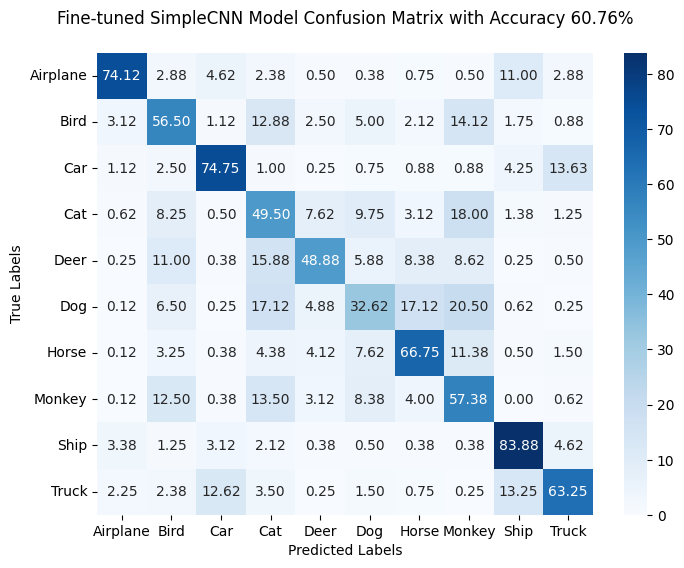

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import STL10
from torchvision import transforms
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define SimpleCNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.flatten(x)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)
        return x

# Download STL-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

batch_size = 4

trainset_STL10 = STL10(root='./data', split='train', download=True, transform=transform)
testset_STL10 = STL10(root='./data', split='test', download=True, transform=transform)

trainloader_STL10 = DataLoader(trainset_STL10, batch_size=batch_size, shuffle=True, num_workers=2)
testloader_STL10 = DataLoader(testset_STL10, batch_size=batch_size, shuffle=False, num_workers=2)

# Create an instance of SimpleCNN model
model = SimpleCNN()

# Load pre-trained weights
for i in range(0, 5):
  pretrained_weights_path = f"./models/cifar10/model{i}.pth"  # Replace with the actual path
  pretrained_dict = torch.load(pretrained_weights_path)

  # Filter out unnecessary keys
  model_dict = model.state_dict()
  pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}

  # Update the model's state dictionary
  model_dict.update(pretrained_dict)
  model.load_state_dict(model_dict)

  # Freeze weights of pre-trained layers
  for param in model.parameters():
      param.requires_grad = False

  # Make the fully connected layers trainable
  for param in model.fc1.parameters():
      param.requires_grad = True
  for param in model.fc2.parameters():
      param.requires_grad = True

  # Move model to GPU
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)

  # Define loss function and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

  # Train the model
  num_epochs = 5

  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      for inputs, labels in trainloader_STL10:
          inputs, labels = inputs.to(device), labels.to(device)
          inputs_resized = F.interpolate(inputs, size=(32, 32), mode='bilinear', align_corners=False)
          optimizer.zero_grad()
          outputs = model(inputs_resized)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

      print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader_STL10)}")

  # Test the fine-tuned model
  model.eval()
  true_labels = []
  all_predictions = []

  with torch.no_grad():
      for inputs, labels in testloader_STL10:
          inputs, labels = inputs.to(device), labels.to(device)
          inputs_resized = F.interpolate(inputs, size=(32, 32), mode='bilinear', align_corners=False)
          outputs = model(inputs_resized)
          _, predicted = torch.max(outputs, 1)
          true_labels.extend(labels.cpu().numpy())
          all_predictions.extend(predicted.cpu().numpy())

  # Plot confusion matrix
  accuracy = accuracy_score(true_labels, all_predictions)
  conf_matrix = confusion_matrix(true_labels, all_predictions)

  # Move confusion matrix to CPU for plotting
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
  conf_matrix = conf_matrix * 100  # Convert to percentage

  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes_STL10, yticklabels=classes_STL10)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Fine-tuned SimpleCNN Model Confusion Matrix with Accuracy {accuracy*100:.2f}%\n')
  plt.savefig(f'./models/stl10/fine_cunfusion_matrix{i}')
  plt.show()


#### ResidualCNN

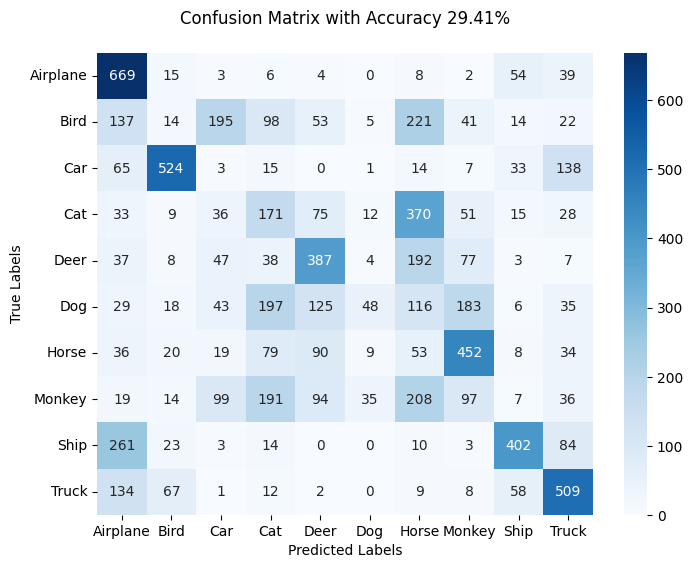

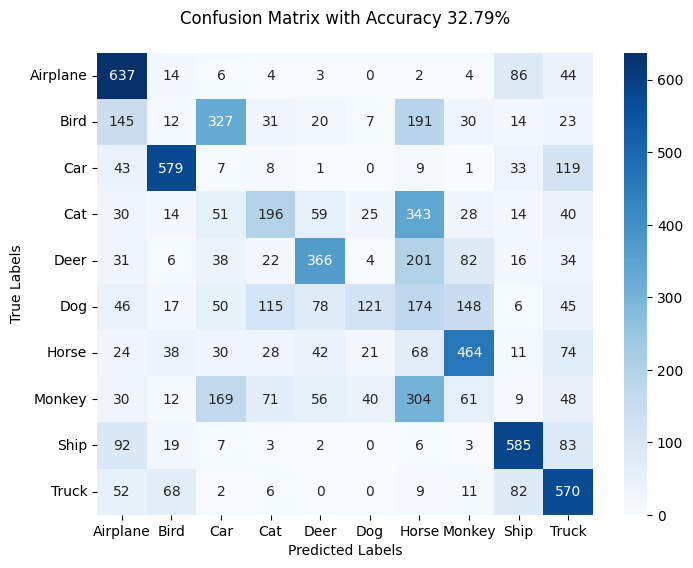

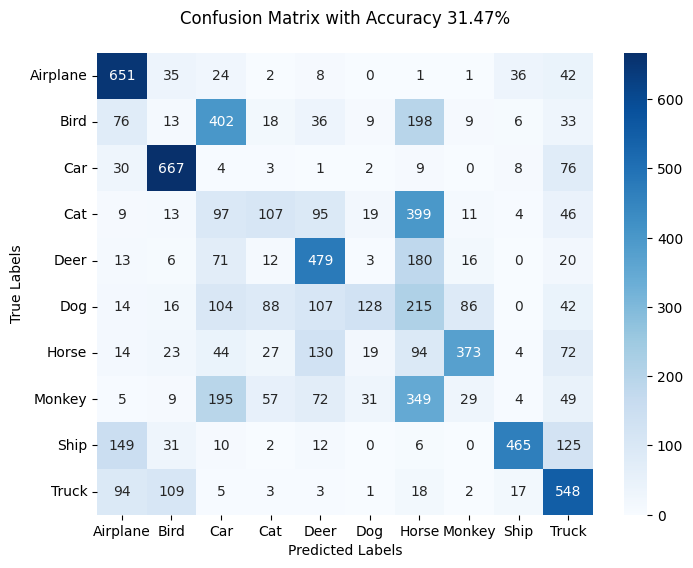

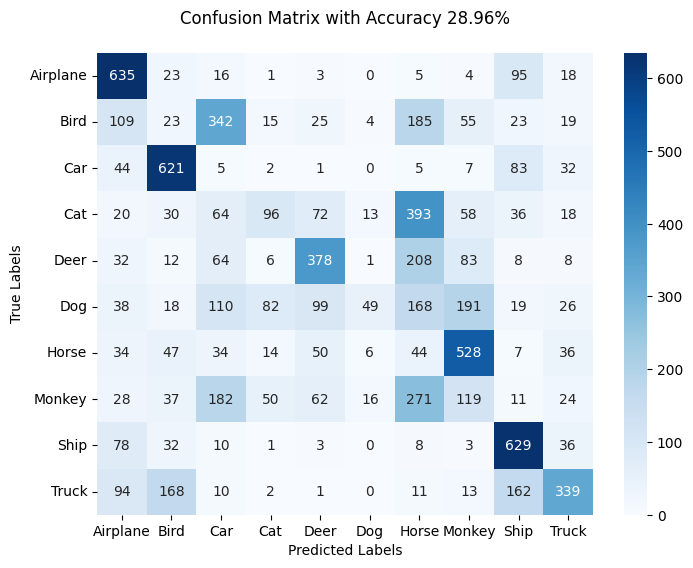

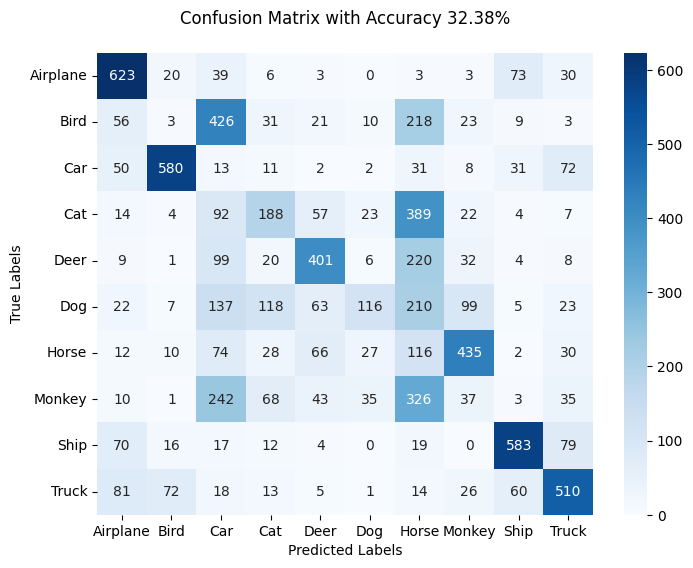

In [36]:
# Load model
for i in range(0, 5):
    model = ResidualCNN()
    model.load_state_dict(torch.load(f'./models/cifar10/r_model{i}.pth'))

    # Evaluate
    model.eval()
    all_predictions = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in testloader_STL10:
            inputs_resized = F.interpolate(inputs, size=(32, 32), mode='bilinear', align_corners=False)
            outputs = model(inputs_resized)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Plot
    accuracy = accuracy_score(true_labels, all_predictions)
    conf_matrix = confusion_matrix(true_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes_STL10, yticklabels=classes_STL10)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix with Accuracy {accuracy*100:.2f}%\n')
    plt.savefig(f'./models/stl10/r_cunfusion_matrix{i}')
    plt.show()
    print('\n\n')

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5, Loss: 2.402518762528896
Epoch 2/5, Loss: 1.528651605463028
Epoch 3/5, Loss: 1.3253557169795036
Epoch 4/5, Loss: 1.2770255034506321
Epoch 5/5, Loss: 1.2492890191853046


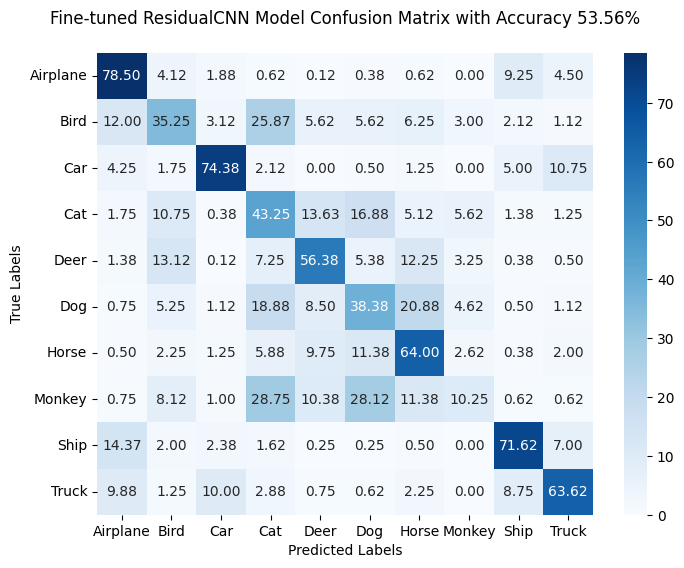

Epoch 1/5, Loss: 1.9866317416667938
Epoch 2/5, Loss: 1.0187419156752526
Epoch 3/5, Loss: 0.776770518758148
Epoch 4/5, Loss: 0.600735124653671
Epoch 5/5, Loss: 0.4694708487478085


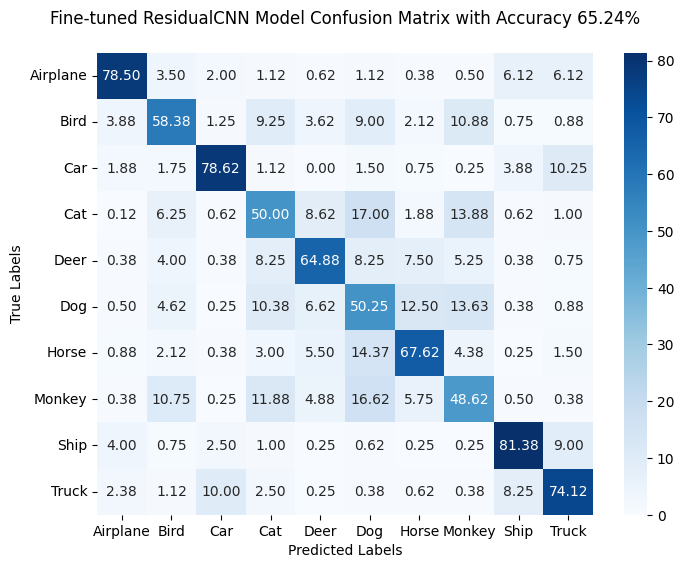

Epoch 1/5, Loss: 1.2999497543662786
Epoch 2/5, Loss: 0.912426090593636
Epoch 3/5, Loss: 0.7419620019555092
Epoch 4/5, Loss: 0.617897905645892
Epoch 5/5, Loss: 0.5010047131678089


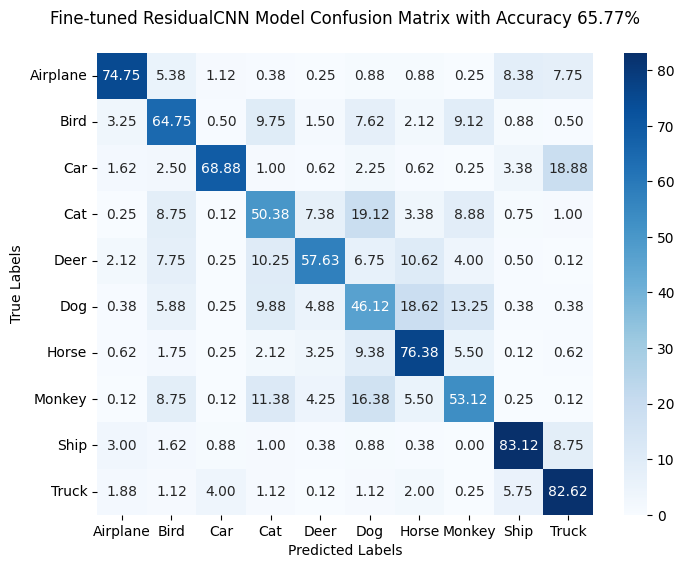

Epoch 1/5, Loss: 1.5249223032474517
Epoch 2/5, Loss: 1.1815587333679198
Epoch 3/5, Loss: 1.0634144627511501
Epoch 4/5, Loss: 0.9782355199754238
Epoch 5/5, Loss: 0.8511160652190447


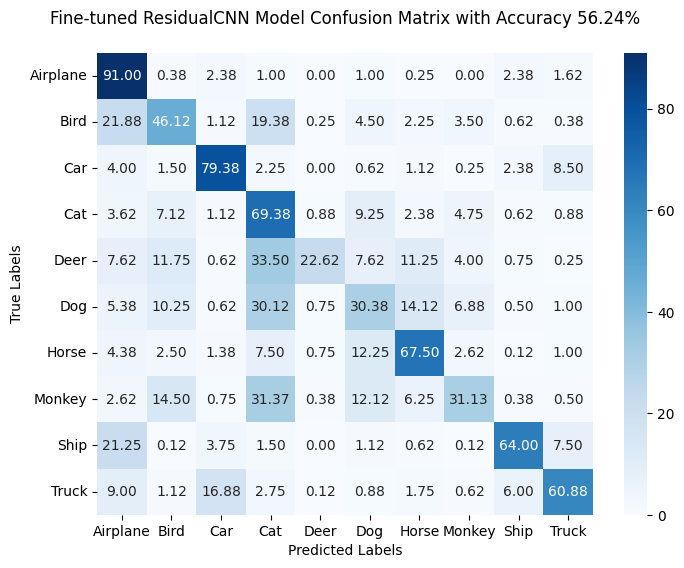

Epoch 1/5, Loss: 1.456793134251237
Epoch 2/5, Loss: 0.846687551420182
Epoch 3/5, Loss: 0.6478625823205337
Epoch 4/5, Loss: 0.4975888981260359
Epoch 5/5, Loss: 0.38826556453565136


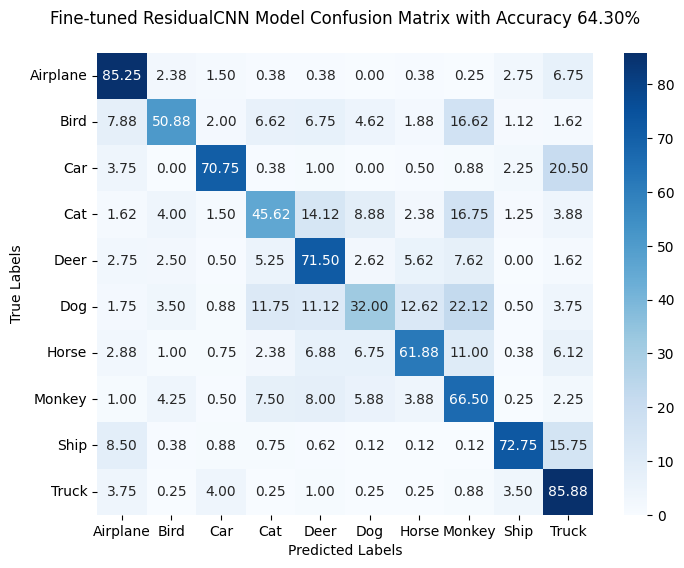

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import STL10
from torchvision import transforms
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define ResidualBlock
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = self.downsample(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x += residual
        x = self.relu(x)
        return x

# Define ResidualCNN model
class ResidualCNN(nn.Module):
    def __init__(self):
        super(ResidualCNN, self).__init__()
        self.conv1 = ResidualBlock(3, 32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = ResidualBlock(32, 64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = ResidualBlock(64, 128)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = self.pool3(self.conv3(x))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Download STL-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

batch_size = 4

trainset_STL10 = STL10(root='./data', split='train', download=True, transform=transform)
testset_STL10 = STL10(root='./data', split='test', download=True, transform=transform)

trainloader_STL10 = DataLoader(trainset_STL10, batch_size=batch_size, shuffle=True, num_workers=2)
testloader_STL10 = DataLoader(testset_STL10, batch_size=batch_size, shuffle=False, num_workers=2)

# Create an instance of ResidualCNN model
model = ResidualCNN()

# Load pre-trained weights
for i in range(0, 5):
  pretrained_weights_path = f"./models/cifar10/r_model{i}.pth"  # Replace with the actual path
  pretrained_dict = torch.load(pretrained_weights_path)

  # Filter out unnecessary keys
  model_dict = model.state_dict()
  pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}

  # Update the model's state dictionary
  model_dict.update(pretrained_dict)
  model.load_state_dict(model_dict)

  # Freeze weights of pre-trained layers
  for param in model.parameters():
      param.requires_grad = False

  # Make the fully connected layers trainable
  for param in model.fc1.parameters():
      param.requires_grad = True
  for param in model.fc2.parameters():
      param.requires_grad = True

  # Move model to GPU
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)

  # Define loss function and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

  # Train the model
  num_epochs = 5

  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      for inputs, labels in trainloader_STL10:
          inputs, labels = inputs.to(device), labels.to(device)
          inputs_resized = F.interpolate(inputs, size=(32, 32), mode='bilinear', align_corners=False)

          optimizer.zero_grad()
          outputs = model(inputs_resized)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

      print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader_STL10)}")

  # Test the fine-tuned model
  model.eval()
  true_labels = []
  all_predictions = []

  with torch.no_grad():
      for inputs, labels in testloader_STL10:
          inputs, labels = inputs.to(device), labels.to(device)
          inputs_resized = F.interpolate(inputs, size=(32, 32), mode='bilinear', align_corners=False)
          outputs = model(inputs_resized)
          _, predicted = torch.max(outputs, 1)
          true_labels.extend(labels.cpu().numpy())
          all_predictions.extend(predicted.cpu().numpy())

  # Plot confusion matrix
  accuracy = accuracy_score(true_labels, all_predictions)
  conf_matrix = confusion_matrix(true_labels, all_predictions)

  # Move confusion matrix to CPU for plotting
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
  conf_matrix = conf_matrix * 100  # Convert to percentage

  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes_STL10, yticklabels=classes_STL10)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Fine-tuned ResidualCNN Model Confusion Matrix with Accuracy {accuracy*100:.2f}%\n')

  plt.show()


### With Inception

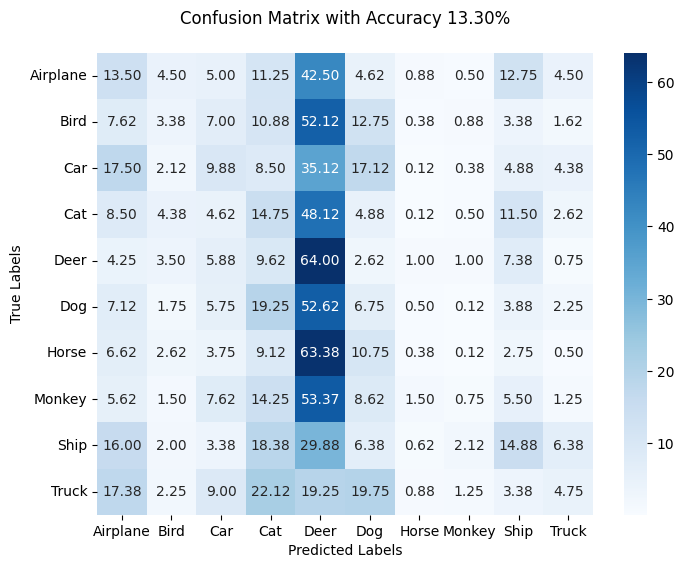

In [ ]:
# Load pre-trained InceptionV3 model
model = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT)
# Modify the last fully connected layer for STL-10 (10 classes)
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.eval()

true_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in testloader_STL10:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Plot confusion matrix
accuracy = accuracy_score(true_labels, all_predictions)
conf_matrix = confusion_matrix(true_labels, all_predictions)

# Move confusion matrix to CPU for plotting
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix * 100  # Convert to percentage

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes_STL10, yticklabels=classes_STL10)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix with Accuracy {accuracy*100:.2f}%\n')

plt.show()


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5, Loss: 0.756371528954263
Epoch 2/5, Loss: 0.26831670333245755
Epoch 3/5, Loss: 0.2066619117168864
Epoch 4/5, Loss: 0.17803971448047146
Epoch 5/5, Loss: 0.1661115428492142


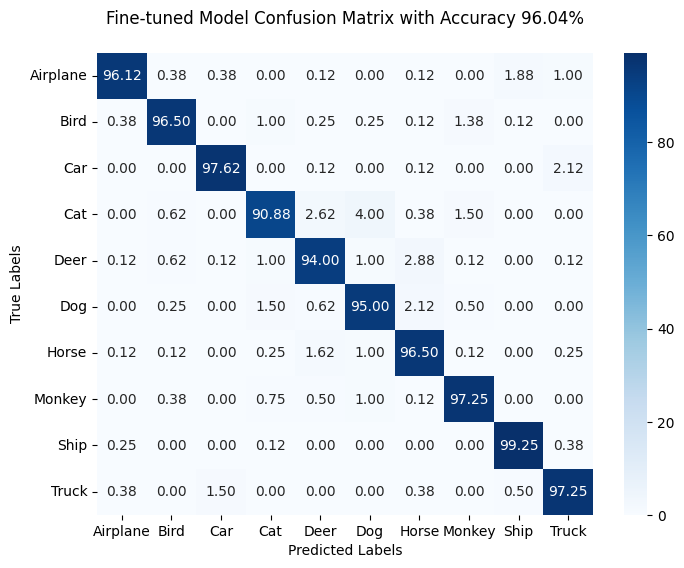

In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import STL10
from torchvision import transforms
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load pre-trained InceptionV3 model
model = models.inception_v3(weights=models.Inception_V3_Weights.DEFAULT)

# Modify the last fully connected layer for STL-10 (10 classes)
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define which layers to freeze and which to fine-tune
for name, param in model.named_parameters():
    if "fc" in name:  # Fine-tune fully connected layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define transform for input images
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
])

# Download STL-10 dataset
train_dataset = STL10(root='./data', split='train', transform=transform, download=True)
test_dataset = STL10(root='./data', split='test', transform=transform, download=True)

trainloader_STL10 = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
testloader_STL10 = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

# Train the model
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in trainloader_STL10:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs, _ = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader_STL10)}")

# Test the fine-tuned model
model.eval()
true_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in testloader_STL10:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Plot confusion matrix
accuracy = accuracy_score(true_labels, all_predictions)
conf_matrix = confusion_matrix(true_labels, all_predictions)

# Move confusion matrix to CPU for plotting
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix * 100  # Convert to percentage

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes_STL10, yticklabels=classes_STL10)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Fine-tuned Model Confusion Matrix with Accuracy {accuracy*100:.2f}%\n')

plt.show()
